In [2]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import os
import sys

scriptpath = "binarygridsearch.py"
# Do the import
sys.path.append(os.path.abspath(scriptpath))

# Do the import
import binarygridsearch as bgs
%aimport binarygridsearch

In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
#Define a function that just returns accuracy
def getForestAccuracy(X, y, metric, kwargs):
    clf = RandomForestClassifier(**kwargs)
    clf.fit(X, y)
    y_pred = clf.oob_decision_function_[:, 1]
    return metric(y, y_pred)

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

In [6]:
rfArgs = {"random_state": 0,
          "n_jobs": -1,
          "class_weight": "balanced",
         "oob_score": True}

In [7]:
n_estimators = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "n_estimators", 
                    0, 
                    32, 
                    128)

,n_estimators,score,time,scoreTimeRatio
0,32,1.073532,0.002697,1.000000
1,128,1.867858,1.002697,0.000000
2,80,2.052255,0.482944,0.006025
3,56,1.605447,0.098106,0.036607
4,68,1.910411,0.429002,0.006539
5,74,2.066440,0.467704,0.006451
6,77,2.066440,0.474240,0.006297
7,75,2.073532,0.462319,0.006619


,n_estimators,score,time
0,32,0.988663,0.173357
1,128,0.989403,0.544099
2,80,0.989575,0.351405
3,56,0.989159,0.208730
4,68,0.989443,0.331406
5,74,0.989588,0.345755
6,77,0.989588,0.348178
7,75,0.989595,0.343758


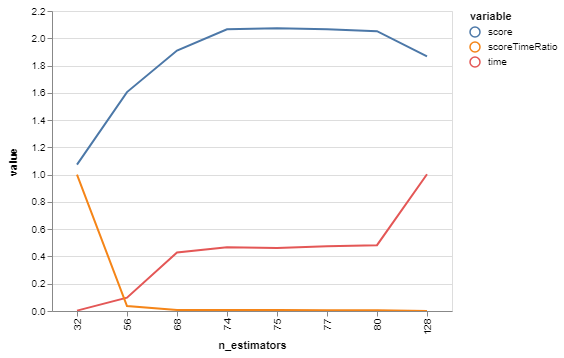

In [8]:
bgs.showTimeScoreChartAndGraph(n_estimators)

,n_estimators,score,time,scoreTimeRatio
0,68,6.390333,0.799277,0.010468
1,80,7.223667,1.054879,0.000000
2,74,7.307000,0.264215,0.189858
3,71,6.307000,0.835091,0.006429
4,72,6.390333,0.054879,1.000000


,n_estimators,score,time
0,68,0.989443,0.351295
1,80,0.989575,0.355952
2,74,0.989588,0.341545
3,71,0.989430,0.351947
4,72,0.989443,0.337730


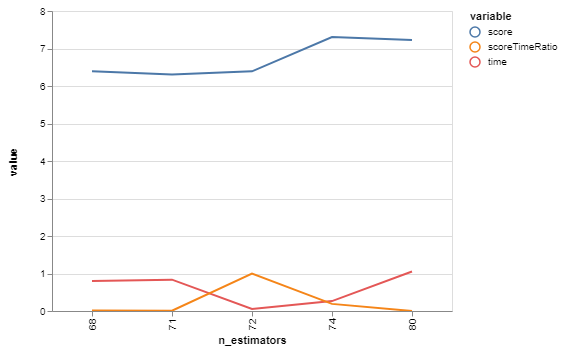

In [9]:
n_estimators = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "n_estimators", 
                    0, 
                    68, 
                    80)

bgs.showTimeScoreChartAndGraph(n_estimators)